연습문제 1번  H0: mu=175    H1: mu != 175

In [2]:
!pip install 'scipy'

     |████████████████████████████████| 33.8 MB 14.9 MB/s eta 0:00:01


In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats

height = pd.read_csv("height.csv")
height.head()

,id,height
0,1,176.150339
1,2,180.178293
2,3,175.217694
3,4,180.038748
4,5,179.015688


<AxesSubplot: xlabel='height'>

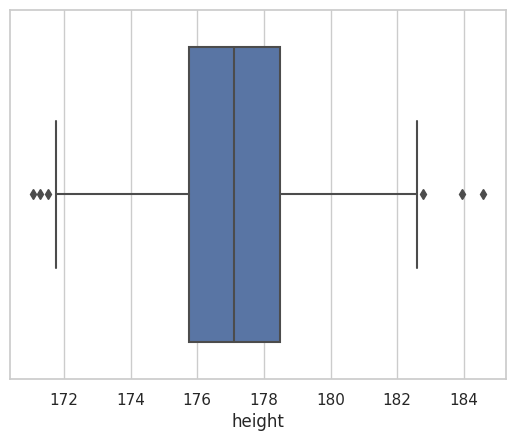

In [4]:
sns.set(style="whitegrid")
sns.boxplot(x="height", data=height)

In [6]:
height_ttest = stats.ttest_1samp(height.height, 175)
print (height_ttest)
print (height_ttest[0]) # t-value 23.347651861095777
print (height_ttest[1]) # p-value 4.916009495893597e-82
print("t-value = %.3f, p-value = %s " % height_ttest)

Ttest_1sampResult(statistic=23.347651861095777, pvalue=4.916009495893597e-82)
23.347651861095777
4.916009495893597e-82
t-value = 23.348, p-value = 4.916009495893597e-82 


## < 0.05  : H0 귀무가설 기각하고  평균이 175cm 라고 할 수 없다. 

문제2번   카페인이 운동 중 호흡교환 비율(RER)에 영향을 미친다고 할 수 있는지 검정

In [10]:
import pandas as pd
from scipy import stats
myDf = pd.DataFrame({"Placebo":[105,119,100,97,96,101,94,95,98],"Caffeine":[96,99,94,89,96,93,88,105,88]})
myDf

,Placebo,Caffeine
0,105,96
1,119,99
2,100,94
3,97,89
4,96,96
5,101,93
6,94,88
7,95,105
8,98,88


In [11]:
# 분산 동일성 검정 후 
# 분산에 대한 검정
stats.bartlett(myDf.Placebo, myDf.Caffeine)

BartlettResult(statistic=0.7443086706153629, pvalue=0.38828414344931017)

In [13]:
stats.levene(myDf.Placebo, myDf.Caffeine)

LeveneResult(statistic=0.05302226935312828, pvalue=0.8208035887045854)

위 두 분산이 p-value > 0.05 보다 큼

In [15]:
data_pc_ttest = stats.ttest_ind(myDf.Placebo, myDf.Caffeine, equal_var=True)
print("Assuming equal variances : t-value = %.3f, p-value = %.3f " % data_pc_ttest)

Assuming equal variances : t-value = 1.995, p-value = 0.063 


> 0.05 유의수준 0.05에서 귀무가설을 채택한다. 카페인은 호흡교환비율(PER) 영향을 미친다고 볼 수 없다.